In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import datetime

In [2]:
df = pd.read_csv("training.csv")
pd.set_option('display.max_columns', None)

# Remove Participants 1 and 37 because of corrupt data

df = df.loc[df['PARTICIPANT_KEY'] != 1.0]
df = df.loc[df['PARTICIPANT_KEY'] != 37.0]


# Add the UTC_DATETIME column
def combine_utc_date_and_time(utc_date, utc_time):
    return datetime.datetime.combine(datetime.datetime.strptime(utc_date, '%Y-%m-%d %H:%M:%S').date(), datetime.datetime.strptime(utc_time, '%H:%M:%S').time())

df['UTC_DATETIME'] = df.apply(lambda row: combine_utc_date_and_time(row['UTC_DATE'], row['UTC_TIME']), axis=1)

In [3]:
df

,AGE,ALTITUDE,E_W,HEIGHT,IHC,JOB,LATITUDE,LOAD,LONGITUDE,LONGITUDE_,N_S,PARTICIPANT_KEY,SEX,SLOPE,SPEED,SQUAD,TRACK_KEY,UP_DOWN,UTC_DATE,UTC_TIME,VALID,WEIGHT,dem_elev,UTC_DATETIME
0,33.0,149.965698,W,"5'11""",Boise,Squad Leader,44.181013,55.0,115.991606,-115.991606,N,8.0,F,999.000000,999.000000,BOF-7A,54,999.0,1999-09-23 00:00:00,20:49:37,FIXED,170.0,1145.339966,1999-09-23 20:49:37
1,33.0,150.032700,W,"5'11""",Boise,Squad Leader,44.180976,55.0,115.991585,-115.991585,N,8.0,F,9.458957,0.900289,BOF-7A,54,1.0,1999-09-23 00:00:00,20:49:42,FIXED,170.0,1146.069946,1999-09-23 20:49:42
2,33.0,150.001968,W,"5'11""",Boise,Squad Leader,44.180923,55.0,115.991650,-115.991650,N,8.0,F,4.384177,1.574299,BOF-7A,54,0.0,1999-09-23 00:00:00,20:49:47,FIXED,170.0,1145.469971,1999-09-23 20:49:47
3,33.0,150.019745,W,"5'11""",Boise,Squad Leader,44.180912,55.0,115.991650,-115.991650,N,8.0,F,5.629937,0.245806,BOF-7A,54,1.0,1999-09-23 00:00:00,20:49:52,FIXED,170.0,1145.589966,1999-09-23 20:49:52
4,33.0,150.055527,W,"5'11""",Boise,Squad Leader,44.180867,55.0,115.991643,-115.991643,N,8.0,F,6.844139,1.014058,BOF-7A,54,1.0,1999-09-23 00:00:00,20:49:57,FIXED,170.0,1146.189941,1999-09-23 20:49:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525040,38.0,1920.610474,W,"6'2""",Truckee,Captain,39.532374,40.0,120.325616,-120.325616,N,73.0,M,6.052385,0.095462,A,290,1.0,1999-10-13 00:00:00,18:43:44,FIXED,195.0,1930.770020,1999-10-13 18:43:44
1525041,38.0,1920.614258,W,"6'2""",Truckee,Captain,39.532374,40.0,120.325616,-120.325616,N,73.0,M,6.052385,0.000000,A,290,0.0,1999-10-13 00:00:00,18:43:45,FIXED,195.0,1930.770020,1999-10-13 18:43:45
1525042,38.0,1920.520508,W,"6'2""",Truckee,Captain,39.532373,40.0,120.325619,-120.325619,N,73.0,M,0.000000,0.270827,A,290,0.0,1999-10-13 00:00:00,18:43:46,FIXED,195.0,1930.770020,1999-10-13 18:43:46
1525043,38.0,1920.203491,W,"6'2""",Truckee,Captain,39.532373,40.0,120.325624,-120.325624,N,73.0,M,2.687602,0.427413,A,290,0.0,1999-10-13 00:00:00,18:43:47,FIXED,195.0,1930.750000,1999-10-13 18:43:47


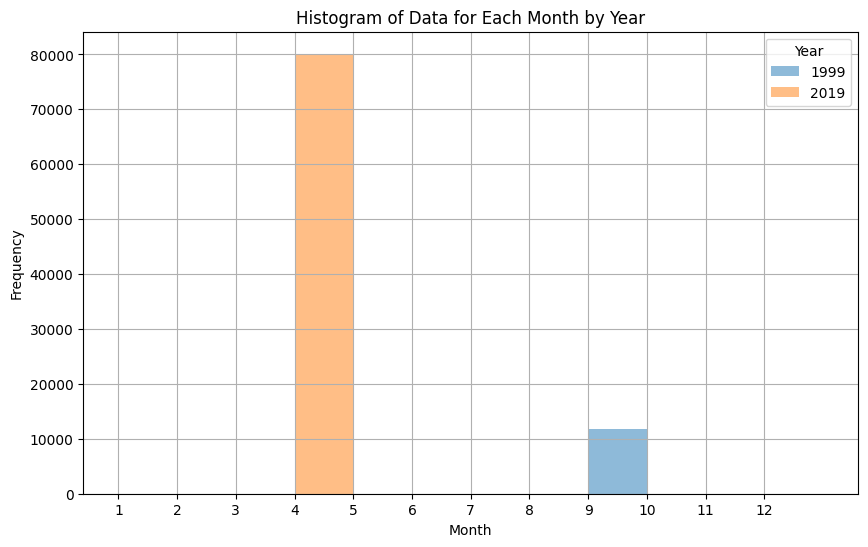

In [4]:
df['year'] = df['UTC_DATETIME'].dt.year
df['month'] = df['UTC_DATETIME'].dt.month

# Plotting
plt.figure(figsize=(10, 6))

# Group by year and plot each year with a different color
for year, group in df[df['IHC'] == 'Redding'].groupby('year'):
    plt.hist(group['month'], bins=range(1, 14), alpha=0.5, label=year)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Histogram of Data for Each Month by Year')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)

# Show the plot
plt.show()

In [5]:
def add_session_ids(data, gap):
    session_id = 0 
    participant = 0.0
    previous = None
    result = []
    for index, row in data.iterrows():
        if row['PARTICIPANT_KEY'] != participant: # must be someone new
            participant = row['PARTICIPANT_KEY']
            session_id += 1
        elif row['UTC_DATETIME'] < previous: # out of order data, must be new
            session_id += 1
        elif row['UTC_DATETIME'] - previous > gap: # big gap, must be new
            session_id += 1
        previous = row['UTC_DATETIME']
        result.append(session_id)
    data['SESSION_ID'] = result


In [6]:
add_session_ids(df, pd.Timedelta(hours = 6))
with pd.option_context('display.max_rows', None):
    print(df.groupby('SESSION_ID').size().reset_index(name='counts'))

     SESSION_ID  counts
0             1     994
1             2    1704
2             3     599
3             4    1058
4             5    1016
5             6    1658
6             7     487
7             8     964
8             9     596
9            10    1001
10           11     963
11           12    1646
12           13     994
13           14    1057
14           15     985
15           16     226
16           17    7116
17           18    5942
18           19     288
19           20    7117
20           21    6149
21           22     108
22           23    7135
23           24    6348
24           25     287
25           26    7125
26           27    6026
27           28    7386
28           29  138170
29           30    1461
30           31    1223
31           32    1468
32           33    1253
33           34    1459
34           35    1171
35           36   25835
36           37    1425
37           38    1192
38           39    1478
39           40    1218
40           41 

In [7]:
earliest_timestamp_indices = df.groupby('SESSION_ID')['UTC_DATETIME'].idxmin()
earliest_timestamp_indices
earliest_rows = df.loc[earliest_timestamp_indices]
earliest_rows
time_sorted_rows = earliest_rows.sort_values('UTC_DATETIME')
for index, row in time_sorted_rows.iterrows():
    print(row['IHC'], row['PARTICIPANT_KEY'], row['UTC_DATETIME'], row['SESSION_ID'])

Redding 50.0 1999-09-03 15:42:25 127
Redding 50.0 1999-09-03 15:46:07 128
Redding 52.0 1999-09-10 16:21:55 136
Redding 52.0 1999-09-10 16:23:37 137
Redding 50.0 1999-09-10 20:57:30 129
Bonneville 20.0 1999-09-16 15:18:23 16
Bonneville 13.0 1999-09-16 15:18:52 19
Bonneville 15.0 1999-09-16 15:19:05 43
Bonneville 16.0 1999-09-16 15:19:08 39
Bonneville 29.0 1999-09-16 15:19:59 32
Bonneville 25.0 1999-09-16 15:20:35 30
Bonneville 26.0 1999-09-16 15:21:05 34
Bonneville 23.0 1999-09-16 15:21:37 22
Bonneville 21.0 1999-09-16 15:21:59 41
Bonneville 24.0 1999-09-16 15:23:28 46
Bonneville 14.0 1999-09-16 15:23:35 37
Bonneville 23.0 1999-09-16 15:23:37 23
Bonneville 13.0 1999-09-16 15:23:37 20
Bonneville 20.0 1999-09-16 15:23:37 17
Bonneville 31.0 1999-09-16 15:23:59 36
Bonneville 27.0 1999-09-16 15:24:52 45
Bonneville 29.0 1999-09-17 15:30:34 33
Bonneville 23.0 1999-09-17 15:32:04 24
Bonneville 13.0 1999-09-17 15:32:32 21
Bonneville 25.0 1999-09-17 15:33:26 31
Bonneville 16.0 1999-09-17 15:34:02

In [8]:
missions = df[['IHC', 'UTC_DATE']].drop_duplicates()
missions

,IHC,UTC_DATE
0,Boise,1999-09-23 00:00:00
994,Boise,1999-09-24 00:00:00
2698,Boise,1999-10-12 00:00:00
3297,Boise,1999-10-18 00:00:00
15722,Bonneville,1999-09-16 00:00:00
...,...,...
1440005,Truckee,1999-10-14 00:00:00
1456510,Truckee,1999-10-15 00:00:00
1459826,Truckee,1999-10-18 00:00:00
1470671,Truckee,1999-10-19 00:00:00


In [9]:
df["IHC"].unique()

array(['Boise', 'Bonneville', 'Logan', 'Lospadres', 'Redding', 'Truckee'],
      dtype=object)

In [10]:
df_mini = df[(df['IHC'] == 'Boise') & (df['UTC_DATE'] == '1999-10-18 00:00:00')]

/tmp/ipykernel_3993267/1252888505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mini['hour'] = df_mini['UTC_DATETIME'].dt.hour


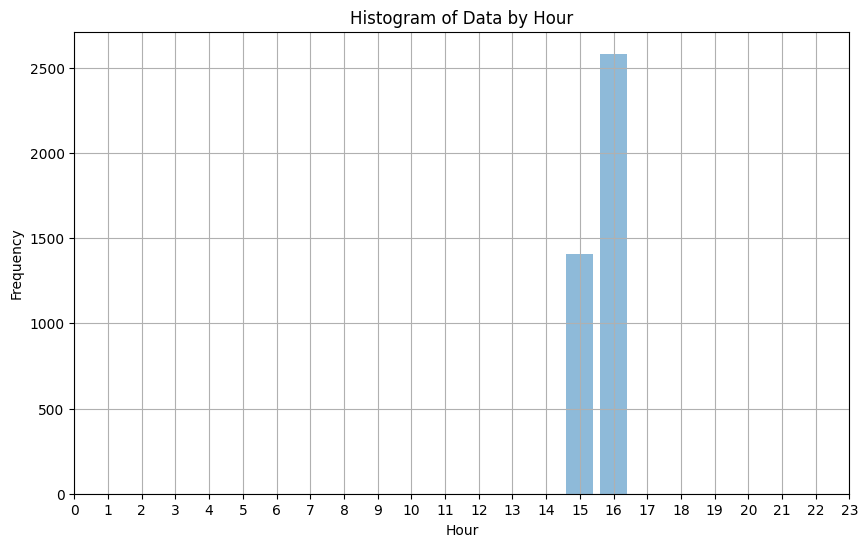

In [11]:
df_mini['hour'] = df_mini['UTC_DATETIME'].dt.hour

hourly_counts = df_mini['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, alpha=0.5)

plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Histogram of Data by Hour')
plt.xticks(range(0, 24))
plt.grid(True)

plt.show()

In [12]:
start_date = {
    "Redding": pd.to_datetime("2019-04-15")
}

In [13]:
df[['IHC', 'UTC_DATE']].drop_duplicates()
df['IHC'].unique()

array(['Boise', 'Bonneville', 'Logan', 'Lospadres', 'Redding', 'Truckee'],
      dtype=object)

In [14]:
def add_mission_ids(interval, df):
    df = df.sort_values(by=['UTC_DATETIME'])
    mission_id = -1
    for unique_row in df['IHC'].unique():
        ihc_date = df[df['IHC'] == unique_row]
        smallest_index = int(ihc_date.index.min())
        last_time_step = ihc_date.loc[smallest_index, 'UTC_DATETIME']
        mission_id = mission_id + 1
        for (index, row) in ihc_date.iterrows():
            if (row['UTC_DATETIME'] - last_time_step) > interval:
                mission_id = mission_id + 1
                last_time_step = row['UTC_DATETIME']
            df.at[index, 'MISSION_ID'] = mission_id     
    return df
interval = pd.Timedelta(hours=6)
df = add_mission_ids(interval, df)

In [15]:
df['MISSION_ID']

1245478     0.0
1245479     0.0
1245480     0.0
1245481     0.0
1245482     0.0
           ... 
413952     38.0
413953     38.0
413954     38.0
413955     38.0
413956     38.0
Name: MISSION_ID, Length: 1525045, dtype: float64

In [16]:
with pd.option_context('display.max_rows', None):
    print(df.groupby('MISSION_ID').size().reset_index(name='counts'))   

    MISSION_ID  counts
0          0.0   39231
1          1.0   52635
2          2.0   39282
3          3.0    4321
4          4.0    4321
5          5.0    4321
6          6.0   32408
7          7.0    4296
8          8.0   14798
9          9.0   27627
10        10.0   21601
11        11.0   21601
12        12.0   21601
13        13.0   21601
14        14.0   21601
15        15.0    8564
16        16.0    3989
17        17.0    6065
18        18.0    1682
19        19.0    3986
20        20.0   33809
21        21.0   13000
22        22.0      53
23        23.0   15966
24        24.0    4965
25        25.0    3247
26        26.0    2716
27        27.0  682721
28        28.0     413
29        29.0   37956
30        30.0   21601
31        31.0   14984
32        32.0   47832
33        33.0   11507
34        34.0   25753
35        35.0    7249
36        36.0    5741
37        37.0   27541
38        38.0    9140
39        39.0   34052
40        40.0   21601
41        41.0   21601
42        4

In [21]:
import czmlizer
import importlib
importlib.reload(czmlizer)

for mission in range(49):
    mission_data = df[df['MISSION_ID'] == mission]
    mission_idx = df[df['MISSION_ID'] == mission].index.min()
    ihc = df.loc[mission_idx,'IHC']
    datetime_start = df.loc[mission_idx,"UTC_DATETIME"]
    cz = czmlizer.Builder()
    for participant in mission_data['PARTICIPANT_KEY'].unique():
        participant_data = mission_data[mission_data['PARTICIPANT_KEY'] == participant]
        trajectory = list(zip(list(participant_data['UTC_DATETIME']), 0.0 - participant_data['LONGITUDE'], participant_data['LATITUDE']))
        cz.add_ground_entity(participant, "../Cesium-1.104/Apps/SampleData/models/ArrowMarker/ArrowMarker.glb", trajectory, f"Participant {participant}", minimum_pixel_size = 25)
    fname = f"./czml_missions/{mission}_{ihc}_{datetime_start}.czml".replace(" ", "")
    with open(fname, 'w') as file:
        file.write(cz.dumps())

FileNotFoundError: [Errno 2] No such file or directory: './czml/0_Redding_2019-04-1915:43:28.czml'

In [ ]:
import czmlizer
import importlib
importlib.reload(czmlizer)

def session_czml(data, session_id):
    session_data = data.loc[data['SESSION_ID'] == session_id]
    participant = session_data.iloc[0]['PARTICIPANT_KEY']
    trajectory = list(zip(list(session_data['UTC_DATETIME']), 0.0 - session_data['LONGITUDE'], session_data['LATITUDE']))
    cz = czmlizer.Builder()
    cz.add_ground_entity(participant, "../Cesium-1.104/Apps/SampleData/models/CesiumMilkTruck/CesiumMilkTruck.glb", trajectory, f"Participant {participant}", minimum_pixel_size = 256)
    return(cz.dumps())

def multi_session_czml(data, session_id_list):
    cz = czmlizer.Builder()
    for session_id in session_id_list:
        session_data = data.loc[data['SESSION_ID'] == session_id]
        participant = session_data.iloc[0]['PARTICIPANT_KEY']
        trajectory = list(zip(list(session_data['UTC_DATETIME']), 0.0 - session_data['LONGITUDE'], session_data['LATITUDE']))
        cz.add_ground_entity(participant, "../Cesium-1.104/Apps/SampleData/models/ArrowMarker/ArrowMarker.glb", trajectory, f"Participant {participant}", minimum_pixel_size = 25)
    return(cz.dumps())

with open("./czml/multi_test4.czml", 'w') as file:
    file.write(multi_session_czml(df, [100]))